In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
import numpy as np
import numba as nb

In [3]:
A = np.random.randn(32, 128)
b = np.random.randn(128)
y = np.zeros(A.shape[0])

In [4]:
%timeit np.dot(A, b, out=y)

1.7 µs ± 30.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Numba

In [5]:
@nb.njit()
def nb_dot(A, b):
    c = np.zeros(A.shape[0])
    for i in range(A.shape[0]):
        for j in range(b.shape[0]):
            c[i] += A[i, j] + b[j]
    return c

In [6]:
%timeit nb_dot(A, b)

11.3 µs ± 6.59 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
@nb.njit()
def nb_dot(A, b):
    c = np.zeros(A.shape[0])
    for i in range(A.shape[0]):
        c[i] = A[i]@b
    return c

In [8]:
%timeit nb_dot(A, b)

2.55 µs ± 63.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
@nb.njit(fastmath=True)
def nb_dot(A, b):
    return np.dot(A, b)

In [10]:
%timeit nb_dot(A, b)

The slowest run took 4.80 times longer than the fastest. This could mean that an intermediate result is being cached.
8.92 µs ± 7.46 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## BLIS

In [11]:
import gemv

In [12]:
%timeit gemv.blis_dgemv(A, b, y)

1.07 µs ± 64.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Benchmarking

In [1]:
batch_sizes = [10, 50, 100, 500, 1000]
nmpy_times = [4.0471, 5.1582, 6.7902, 14.0031, 25.448]
blis_times = [3.0048, 3.8063, 5.1556, 12.4542, 22.3393]

In [3]:
import matplotlib.pyplot as plt

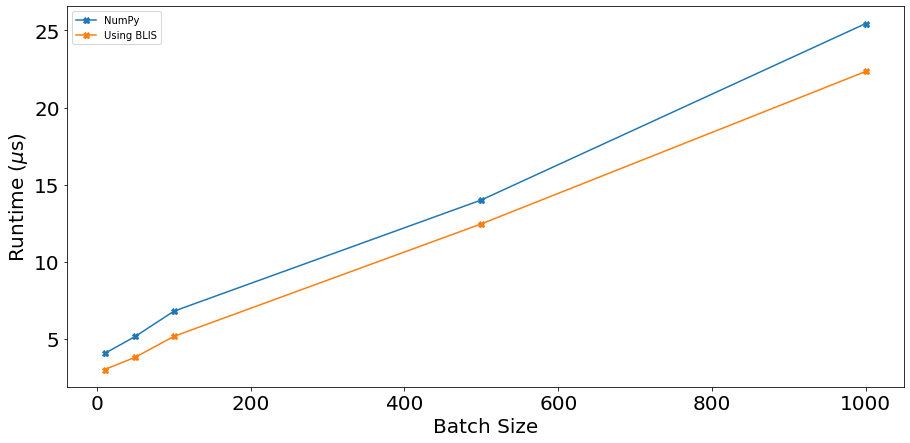

In [4]:
plt.rcParams['savefig.facecolor']='#111111'
plt.figure(figsize=(15, 7), frameon=False)
plt.plot(batch_sizes, nmpy_times, 'X-', label="NumPy")
plt.plot(batch_sizes, blis_times, 'X-', label="Using BLIS")
plt.legend()
plt.xlabel('Batch Size', fontsize=20)
plt.ylabel('Runtime ($\mu$s)', fontsize=20)
plt.xticks(fontsize=20); plt.yticks(fontsize=20)
plt.savefig('./benchmark.png', transparent=False)

In [ ]:
percentage_gain = []

In [6]:
percentage_gain = []
for bs, n, b in zip(batch_sizes, nmpy_times, blis_times):
    gain = round((n-b)/n*100,2)
    print('|', bs, '|', gain, '%', '|')
    percentage_gain.append(gain)

| 10 | 25.75 % |
| 50 | 26.21 % |
| 100 | 24.07 % |
| 500 | 11.06 % |
| 1000 | 12.22 % |


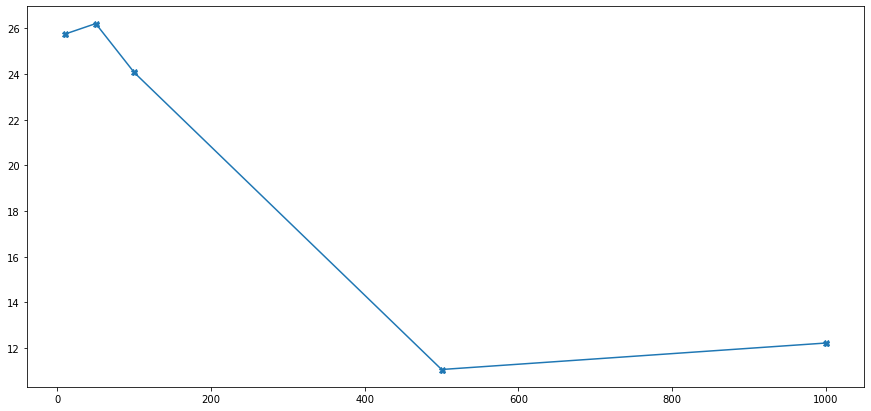

In [8]:
plt.rcParams['savefig.facecolor']='#111111'
plt.figure(figsize=(15, 7), frameon=False)
plt.plot(batch_sizes, percentage_gain, 'X-', label="")
# plt.legend()
# plt.xlabel('Batch Size', fontsize=20)
# plt.ylabel('$\frac{numpy-blis}{numpy}$', fontsize=20, rotation=90)
# plt.xticks(fontsize=20); plt.yticks(fontsize=20)
# plt.savefig('./benchmark.png', transparent=False)